### Se pide, usando regresión lineal:

Dibujar con una línea la relación que hay entre la altura y la edad de los alumnos de esta clase: 

- ¿Es una buena técnica para este tipo de problemas? ¿Por qué? 
- ¿Qué error se comete? Calcula los errores que está cometiendo tu modelo uno a uno (lo tienes que calcular tú con python). Aparte, usa el MSE y el RMSE. ¿Alguno es mejor para este problema?
- Representa la matriz de correlación, ¿los datos están correlacionados?

In [2]:
lista_alumnos = [("Leonardo Sánchez", 24, 1.82), 
                 ("Piero Termini", 25, 1.71), 
                 ("Marta Buesa", 35, 1.66), 
                 ("Silvia Pasinato", 37, 1.63), 
                 ("Faro Zamani", 29, 1.90), 
                 ('Miguel Nievas', 27, 1.80), 
                 ("Alejandro Medina", 28, 1.70), 
                 ("Cristina Martínez", 32, 1.60), 
                 ("Francisco Palma", 36, 1.74), 
                 ("Jorge Duque", 45, 1.72), 
                 ("Jesús Llanes", 41, 1.65), 
                 ("Marta Gómez", 30, 1.65), 
                 ("Jennifer Sanchez", 40, 1.60), 
                 ("Diego Isla", 39, 1.80), 
                 ("Antonio Campaña", 23, 1.77), 
                 ("Juan Maniglia", 32, 1.75), 
                 ("David Suárez", 27, 1.70), 
                 ("Antonio Jiménez", 34, 1.80), 
                 ("Carlos Hernández", 27, 1.77), 
                 ("Erik Urresta", 28, 1.70), 
                 ("Marcos Lobo", 35, 1.80)] 

In [6]:
# importing librarires
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
sns.set_style('whitegrid')

In [3]:
df = pd.DataFrame(lista_alumnos,
                  columns=['nombre','edad', 'altura'])

In [4]:
df

,nombre,edad,altura
0,Leonardo Sánchez,24,1.82
1,Piero Termini,25,1.71
2,Marta Buesa,35,1.66
3,Silvia Pasinato,37,1.63
4,Faro Zamani,29,1.90
5,Miguel Nievas,27,1.80
6,Alejandro Medina,28,1.70
7,Cristina Martínez,32,1.60
8,Francisco Palma,36,1.74
9,Jorge Duque,45,1.72


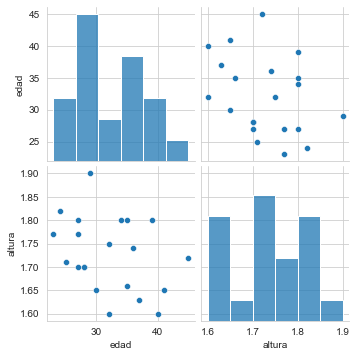

In [11]:
sns.pairplot(df);

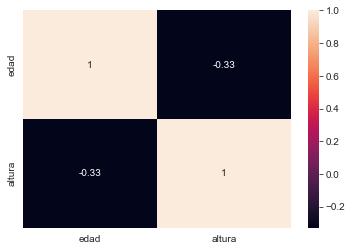

In [10]:
sns.heatmap(df.corr(), annot=True);

In [17]:
X = df[['edad']]

y = df[['altura']]



X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)

lm = LinearRegression(n_jobs=-1) 
lm.fit(X_train, y_train)

predictions = lm.predict(X_test)
predictions

print(lm.intercept_)
print(lm.coef_)
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

[1.8580513]
[[-0.00435721]]
MAE: 0.05318486080700664
MSE: 0.0033126493607306537
RMSE: 0.057555619714591326


C:\Users\jamr1\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\jamr1\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


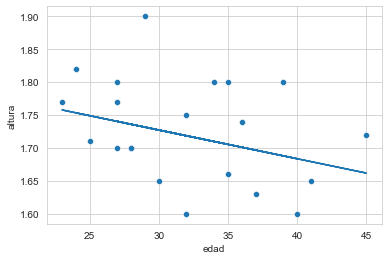

In [23]:
sns.scatterplot(df['edad'],df['altura'])
plt.plot(df['edad'], lm.predict(X.values.reshape(-1,1)));

In [ ]:
df['pred'] = lm.predict(X.values.reshape(-1,1))
df['error'] = 